# 2.1 Кластеризация. Птичка.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [ODS: Обучение без учителя: PCA и кластеризация](https://habrahabr.ru/company/ods/blog/325654/)
- [Интересные алгоритмы кластеризации, часть первая: Affinity propagation](https://habrahabr.ru/post/321216/) и другие статьи цикла
- [Глава 7: кластеризация и визуализация. К. В. Воронцов](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf)
- [Документация sklearn.clustering](http://scikit-learn.org/stable/modules/clustering.html)
- [K-Means Clustering - The Math of Intelligence. Siraj Raval](https://www.youtube.com/watch?v=9991JlKnFmk) объяснение с программированием KMeans вручную

In [0]:
# на всякий случай, список пакетов которые должны быть установлены
!pip3 install numpy pandas scipy sklearn matplotlib seaborn Pillow scikit-image

## Изображения (6 баллов)

С помощью алгоритмов кластеризации можно уменьшить число цветов в изображении. В данном случае будут кластеризоваться похожие пиксели. Такой подход позволяет перейти к суперпиксельному представлению изображений, которое является более компактным и используется в задачах компьютерного зрения.

Загрузим картинку `data/bird.jpg` с помощью scikit-image и выведите ее с помощью matplotlib.

In [58]:
colab = False # если работаете на своём компьютере, поставьте False
if colab:
    from google.colab import drive
    drive.mount('/content/drive/')

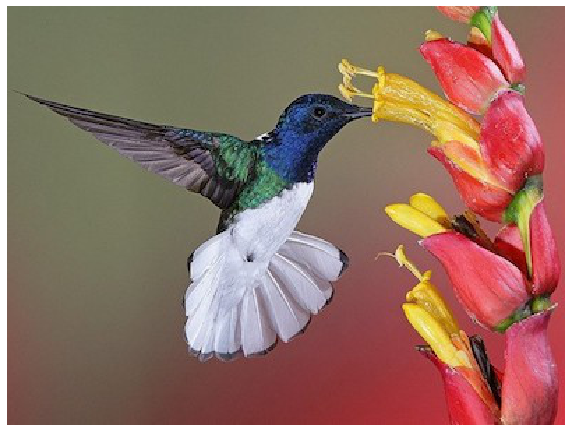

In [59]:
%matplotlib inline
from skimage.io import imread
from matplotlib import pyplot as plt
import numpy as np

if colab:
    img = imread("/content/drive/My Drive/Data/bird.jpg")
else:
    img = imread("../2/data/bird.jpg")
plt.figure(figsize=(10,15))
plt.axis('off')
plt.imshow(img)

### 1.1 Scale (0.5 балла)

Если вы посмотрите на содержимое numpy массива, в котором хранится изображение, то увидите, что там будут числа от 0 до 255. Нам лучше перейти к числам от 0 до 1. 

**Преобразуйте вашу матрицу, как сказано выше.**

**Hint**: Это можно сделать с помощью функции `skimage.img_as_float`.

In [60]:
import skimage
img_float = skimage.img_as_float(img)
img_float

array([[[0.43529412, 0.45882353, 0.35686275],
        [0.43529412, 0.45882353, 0.35686275],
        [0.43529412, 0.45882353, 0.35686275],
        ...,
        [0.56078431, 0.38823529, 0.35294118],
        [0.56078431, 0.38823529, 0.35294118],
        [0.56862745, 0.38431373, 0.35294118]],

       [[0.43529412, 0.45882353, 0.35686275],
        [0.43529412, 0.45882353, 0.35686275],
        [0.43921569, 0.4627451 , 0.36078431],
        ...,
        [0.56078431, 0.38823529, 0.35294118],
        [0.56862745, 0.38431373, 0.35294118],
        [0.56862745, 0.38431373, 0.35294118]],

       [[0.43921569, 0.4627451 , 0.36078431],
        [0.43921569, 0.4627451 , 0.36078431],
        [0.43921569, 0.4627451 , 0.36078431],
        ...,
        [0.56078431, 0.38823529, 0.35294118],
        [0.56470588, 0.38039216, 0.34901961],
        [0.56470588, 0.38039216, 0.34901961]],

       ...,

       [[0.45098039, 0.2745098 , 0.25490196],
        [0.45098039, 0.2745098 , 0.25490196],
        [0.44705882, 0

### 1.2 Reshape (1 балл)

Мы получили матрицу размера `(300, 400, 3)`. Нам это не подходит. Чтобы запустить kMeans нам нужно иметь много-много объектов и 3 признака - значение яркости пикселя в канале Red, Green и Blue. 

**Преобразуйте матрицу так, чтобы получилась матрица размера `(120000, 3)`. **

**Hint**: Вам пригодятся функции: `np.ravel` и `np.vstack`.

In [61]:
reshape_img_float = img_float.reshape(120000, 3)
reshape_img_float

array([[0.43529412, 0.45882353, 0.35686275],
       [0.43529412, 0.45882353, 0.35686275],
       [0.43529412, 0.45882353, 0.35686275],
       ...,
       [0.81176471, 0.2       , 0.25490196],
       [0.80392157, 0.19607843, 0.25882353],
       [0.79607843, 0.19607843, 0.26666667]])

### 1.3 Train (0.5 балла)

Отлично. У нас есть подготовленные данные. Теперь мы будем находить кластеры похожих пикселей по цвету. Для этого создайте KMeans для, например, 8 цветов. **Обучите модель** (может занять около 10 секунд). С помощью магического макроса `%time` **покажите, сколько времени у вас занимало обучение**.

In [62]:
from sklearn.cluster import KMeans
k = KMeans().fit(reshape_img_float)
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs


### 1.4 Draw centroids (1 балл)

**Нарисуйте с помощью imshow центры кластеров**: будет 8 пикселей со средним цветом по всему кластеру. 
Это называется цветовой палитрой. 

**Hint**: reshape в 3 мерный массив, так как у вас будет 2-мерный

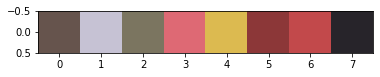

In [63]:
plt.imshow(k.cluster_centers_.reshape(1, 8, 3))

### 1.5 Draw final image (3 балла)

У нас есть значения цвета для каждого центра кластера. Каждый пиксель в результате обучения KMeans теперь имеет свой лейбл кластера. Значит мы можем заменить все пиксели на соответсвующие им центры класетров. Проведите это преобразование и выведите 8-цветное изображение.

**Hints**: `labels_`, `reshape`, `copy`, логические маски в numpy `arr[arr == 1] = 0`. У меня это 7 строк кода.

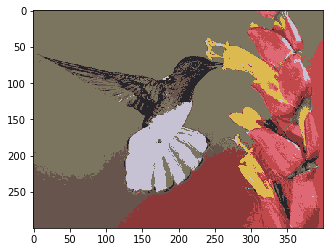

In [67]:
new_img = np.copy(reshape_img_float)
for i in range(8):
    new_img[k.labels_ == i] = k.cluster_centers_[i]
plt.imshow(new_img.reshape(300,400,3))